## StoryVIZAI: Visual Storyboard Creation Tool

### Team Members:
### 1. Ankur Kaushal
### 2. Dyuti Dasmahapatra
### 3. Himanshu Sharma
### 4. Palak Gupta
### 5. Priyanshu Yadav

In [ ]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from easygoogletranslate import EasyGoogleTranslate
from torchmetrics.functional.multimodal import clip_score
from functools import partial

In [ ]:
!pip install hugchat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00


## 1. Prompt Generation

In [ ]:
from hugchat import hugchat
from hugchat.login import Login

EMAIL = "dyuti.dasmahapatra.21cse@bmu.edu.in"
PASSWD = " "
cookie_path_dir = "./cookies"
sign = Login(EMAIL, PASSWD)
cookies = sign.login(cookie_dir_path=cookie_path_dir, save_cookies=True)
chatbot = hugchat.ChatBot(cookies=cookies.get_dict())

In [ ]:
user_input = input('> ')
response = ""

response = chatbot.chat(user_input)
print(response)

> give me a 6 line story starting from "a little girl walking on the street" in 6 points
A little girl, alone, walks along the bustling street,
She clutches her worn teddy bear, her only comfort in the big city,
Suddenly, a strong gust rips the teddy bear from her grasp.
Tears blur her vision as she watches her teddy roll into traffic.
A stranger rushes to retrieve the bear
With a grateful smile, the girl embraces her teddy bear.


In [ ]:
scenes = response.split('\n')
scenes = [scene.strip() for scene in scenes if scene.strip()]


In [ ]:
user_input = input('> ')
response1 = ""

response1 = chatbot.chat(user_input)
print(response1)

 give me a description of a little girl, skin color, hair color, eye color, color of dress, hair length
a little girl with shoulder length black hair,bangs, blue white dress, fair skin, big blue eyes, 


In [ ]:
desc = response1

## 2. Baseline Model Image Generation

In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
neg_prompt = "text,ugly, blurry, poor quality"

In [ ]:
scene1 = desc + scenes[0]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

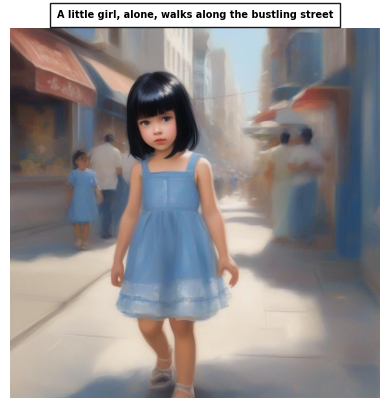

In [ ]:
img1 = np.array(image)

plt.imshow(img1)
plt.axis('off')

plt.text(0.5, 1.05, scene1, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene2 = desc + scenes[1]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

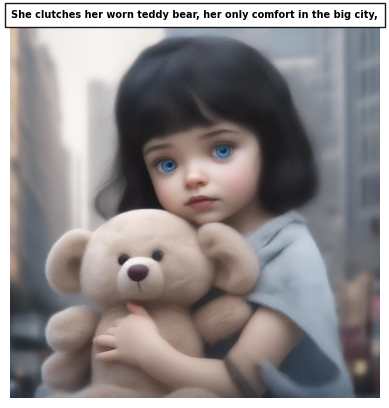

In [ ]:
scene2 = desc + scenes[1]
image = pipe(prompt=scene2, negative_prompt=neg_prompt).images[0]
img2 = np.array(image)

plt.imshow(img2)
plt.axis('off')


plt.text(0.5, 1.05, scene2, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene3 = desc + scenes[2]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

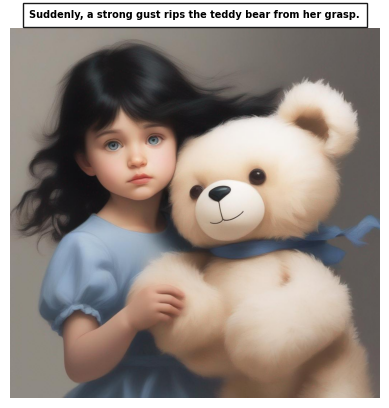

In [ ]:
img3 = np.array(image)

plt.imshow(img3)
plt.axis('off')

plt.text(0.5, 1.05, scene3, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene4 = desc + scenes[3]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

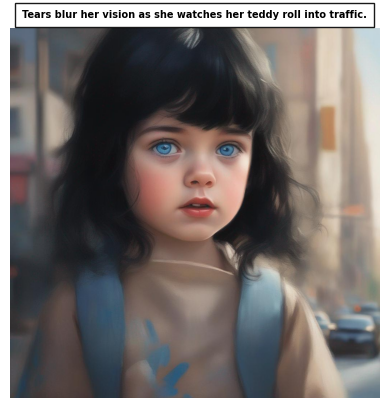

In [ ]:
img4 = np.array(image)

plt.imshow(img4)
plt.axis('off')
plt.text(0.5, 1.05, scene4, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene5 = desc + scenes[4]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

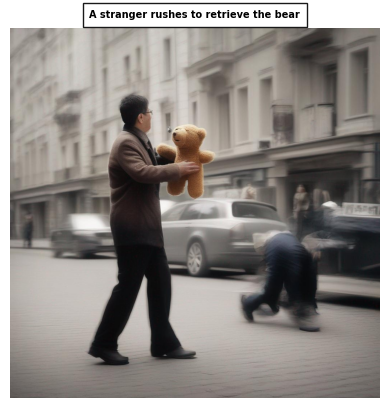

In [ ]:
img5 = np.array(image)

plt.imshow(img5)
plt.axis('off')

scene5 = 'A stranger rushes to retrieve the bear'
plt.text(0.5, 1.05, scene5, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene6 = desc + scenes[5]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

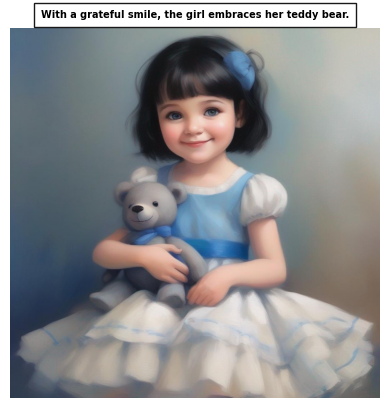

In [ ]:
img6 = np.array(image)

plt.imshow(img6)
plt.axis('off')

plt.text(0.5, 1.05, scene6, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

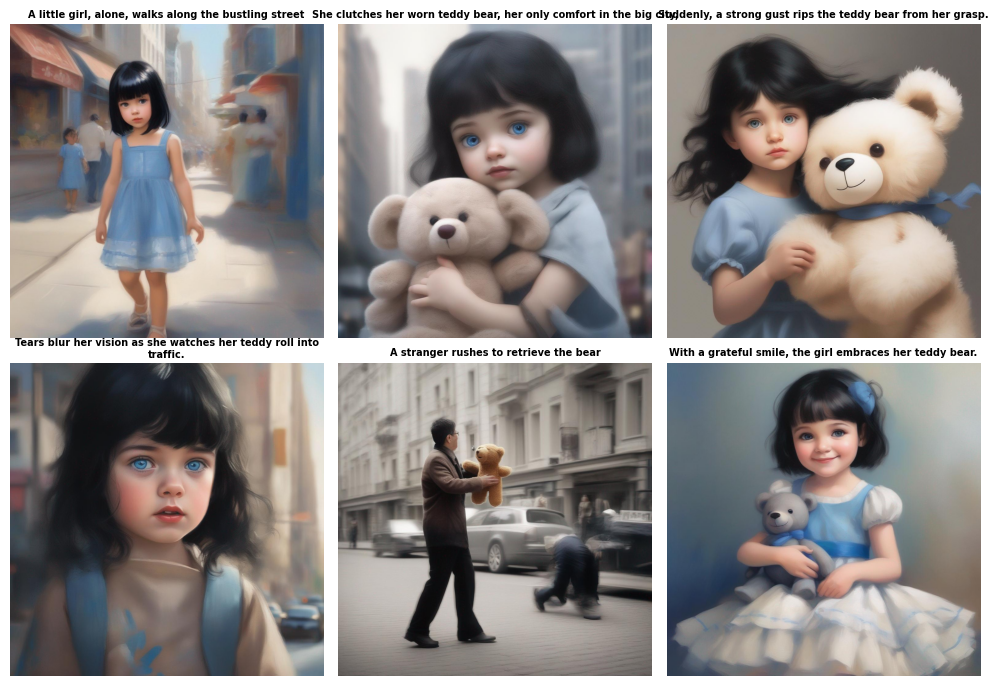

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7))

for i, ax in enumerate(axs.flat):
    img = mpimg.imread(img[i])
    ax.imshow(img)
    ax.axis('off')


    ax.set_title(scenes[i-1], fontsize=7, fontweight='bold', wrap=True, pad=5)

plt.tight_layout()
plt.show()


## 3. Fine-tuning

In [ ]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 61444, done.
remote: Counting objects: 100% (750/750), done.
remote: Compressing objects: 100% (452/452), done.
remote: Total 61444 (delta 445), reused 458 (delta 260), pack-reused 60694
Receiving objects: 100% (61444/61444), 43.10 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (44757/44757), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-py3-none-any.whl size=2128377 sha256=4d5c9cfb86503a18ae4b688b05de9b37033c77e887009d3023693db064288b5f
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ql6azmj/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 28.2 MB/s eta 0:00:00
    

In [ ]:
!accelerate config default --mixed_precision fp16

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
os.environ['MODEL_NAME'] = f'stabilityai/stable-diffusion-xl-base-1.0'
os.environ['DATASET_NAME'] = f'shellypeng/cartoon-captioned-datasets'
os.environ['OUTPUT_DIR'] = f'/Model'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=400 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --checkpointing_steps=100000 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir=$OUTPUT_DIR

Streaming output truncated to the last 5000 lines.
Steps:  53% 5291/10000 [3:24:06<3:01:25,  2.31s/it, lr=1e-5, step_loss=0.0173]11/13/2022 16:15:18 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  53% 5292/10000 [3:24:08<3:01:32,  2.31s/it, lr=1e-5, step_loss=0.0249]11/13/2022 16:15:20 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  53% 5293/10000 [3:24:10<3:02:48,  2.33s/it, lr=1e-5, step_loss=0.0334]11/13/2022 16:15:23 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  53% 5294/10000 [3:24:13<3:01:42,  2.32s/it, lr=1e-5, step_loss=0.02]11/13/2022 16:15:25 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  53% 5295/10000 [3:24:15<3:02:23,  2.33s/it, lr=1e-5, step_loss=0.0783]11/13/2022 16:15:27 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  53% 5296/10000 [3:24:17<3:02:10,  2.32s/it, lr=1e-5, step_loss=0.0537]11/13/2022 16:15:30 - INFO - accelerate.tracking - Su

## 4. Fine Tuned Model Image Generation

In [ ]:
images = []

In [ ]:
model_path = "./Model/finetuned_model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)

scene1 = desc + scenes[0]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]
images[0] = image

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

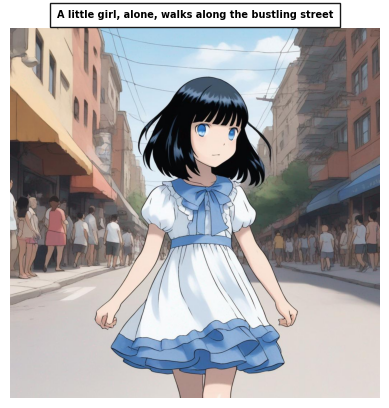

In [ ]:
img1 = np.array(image)

plt.imshow(img1)
plt.axis('off')

plt.text(0.5, 1.05, scene1, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene2 = desc + scenes[1]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]
images[1] = image

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

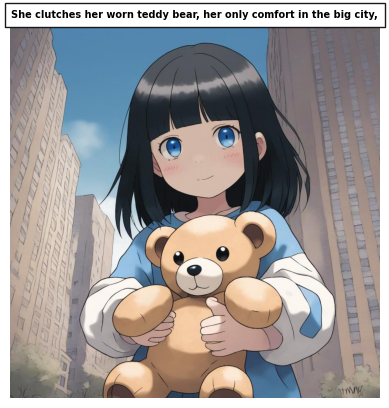

In [ ]:
img2 = np.array(image)

plt.imshow(img2)
plt.axis('off')

plt.text(0.5, 1.05, scene2, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene3 = desc + scenes[2]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]
images[2] = image

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

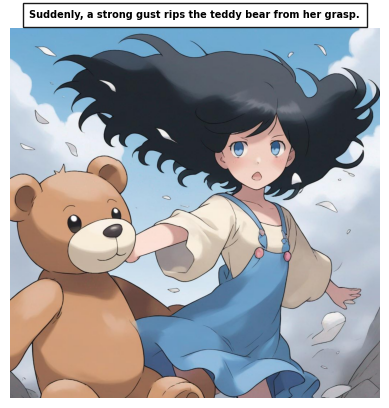

In [ ]:
img3 = np.array(image)

plt.imshow(img3)
plt.axis('off')

plt.text(0.5, 1.05, scene3, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene4 = desc + scenes[3]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]
images[3] = image

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

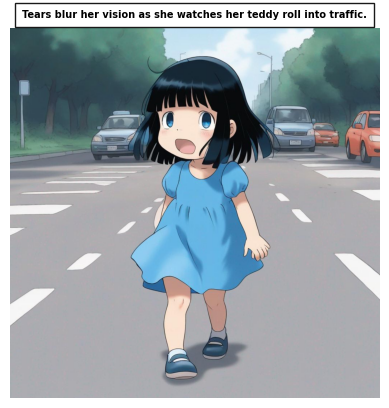

In [ ]:
img4 = np.array(image)

plt.imshow(img4)
plt.axis('off')
plt.text(0.5, 1.05, scene4, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene5 = desc + scenes[4]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]
images[4] = image

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

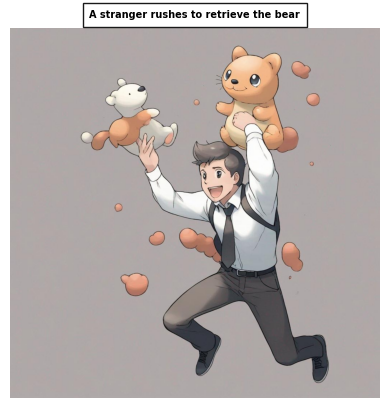

In [ ]:
img5 = np.array(image)

plt.imshow(img5)
plt.axis('off')

plt.text(0.5, 1.05, scene5, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

In [ ]:
scene6 = desc + scenes[5]
image = pipe(prompt=scene1, negative_prompt=neg_prompt).images[0]
images[5] = image

Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
Token indices sequence length is longer than the specified maximum sequence length for this model (116 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxatio

  0%|          | 0/50 [00:00<?, ?it/s]

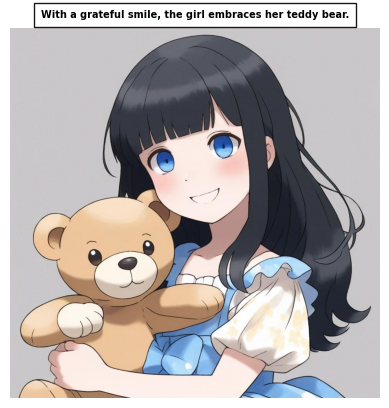

In [ ]:
img6 = np.array(image)

plt.imshow(img6)
plt.axis('off')

scene6 = 'With a grateful smile, the girl embraces her teddy bear.'
plt.text(0.5, 1.05, scene6, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)

plt.show()

## 5. Evaluation

In [ ]:
clip_score_fn = partial(clip_score, model_name_or_path="./Model/finetuned_model")

def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)

sd_clip_score = calculate_clip_score(images, scenes)
print(f"CLIP score: {sd_clip_score}")

CLIP score: 35.7038


## 6. Final Story Board in Grid Form

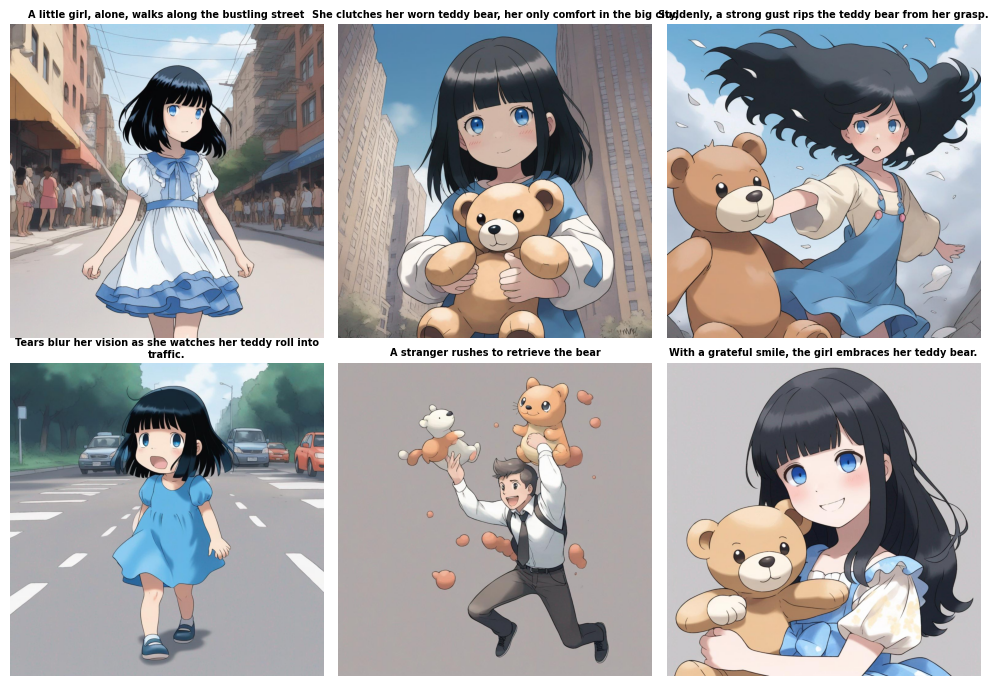

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7))

for i, ax in enumerate(axs.flat):
    img = mpimg.imread(img[i])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(scenes[i-1], fontsize=7, fontweight='bold', wrap=True, pad=5)

plt.tight_layout()
plt.show()


## 7. Language Translation

In [ ]:
!pip install easygoogletranslate

In [ ]:
translator = EasyGoogleTranslate(
    source_language='en',
    target_language='hi',
    timeout=10
)


translated_scenes = []

for scene in scenes:
    result = translator.translate(scene)
    translated_scenes.append(result)

print(translated_scenes)


['एक छोटी लड़की, अकेली, हलचल भरी सड़क पर चल रही है', 'वह अपने घिसे-पिटे टेडी बियर को पकड़ती है, जो बड़े शहर में उसका एकमात्र आराम है,', 'अचानक, एक तेज़ झोंका टेडी बियर को उसकी पकड़ से छीन लेता है।', 'जब वह अपने टेडी को ट्रैफ़िक में लुढ़कते हुए देखती है तो आँसू उसकी दृष्टि को धुंधला कर देते हैं।', 'एक अजनबी भालू को वापस लाने के लिए दौड़ता है', 'कृतज्ञ मुस्कान के साथ, लड़की अपने टेडी बियर को गले लगा लेती है।']


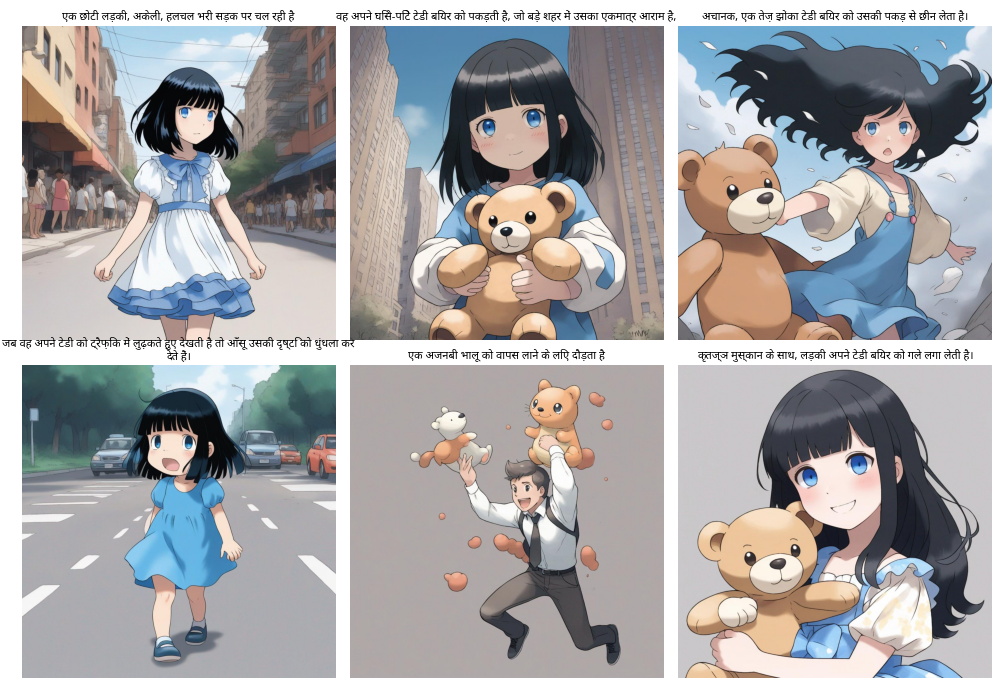

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
font_path = '/content/NotoSans-VariableFont_wdth,wght.ttf'
font_prop = FontProperties(fname=font_path, size=8)

for i, ax in enumerate(axs.flat):
    img = mpimg.imread(img[i])
    ax.imshow(img)
    ax.axis('off')

    ax.set_title(translated_scenes[i-1], fontsize=7,fontproperties=font_prop, fontweight='bold', wrap=True, pad=5)

plt.tight_layout()
plt.show()


In [ ]:
def story_gen(lan):

    translator = EasyGoogleTranslate(
        source_language='en',
        target_language=lan,
        timeout=10
    )
    translated_scenes = [translator.translate(scene) for scene in scenes]

    fig, axs = plt.subplots(2, 3, figsize=(10, 7))
    font_path = '/content/NotoSans-VariableFont_wdth,wght.ttf'
    font_prop = FontProperties(fname=font_path, size=8)

    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(img[i])
        ax.imshow(img)
        ax.axis('off')

        ax.set_title(translated_scenes[i-1], fontsize=7, fontproperties=font_prop, fontweight='bold', wrap=True, pad=5)

    plt.tight_layout()
    plt.show()

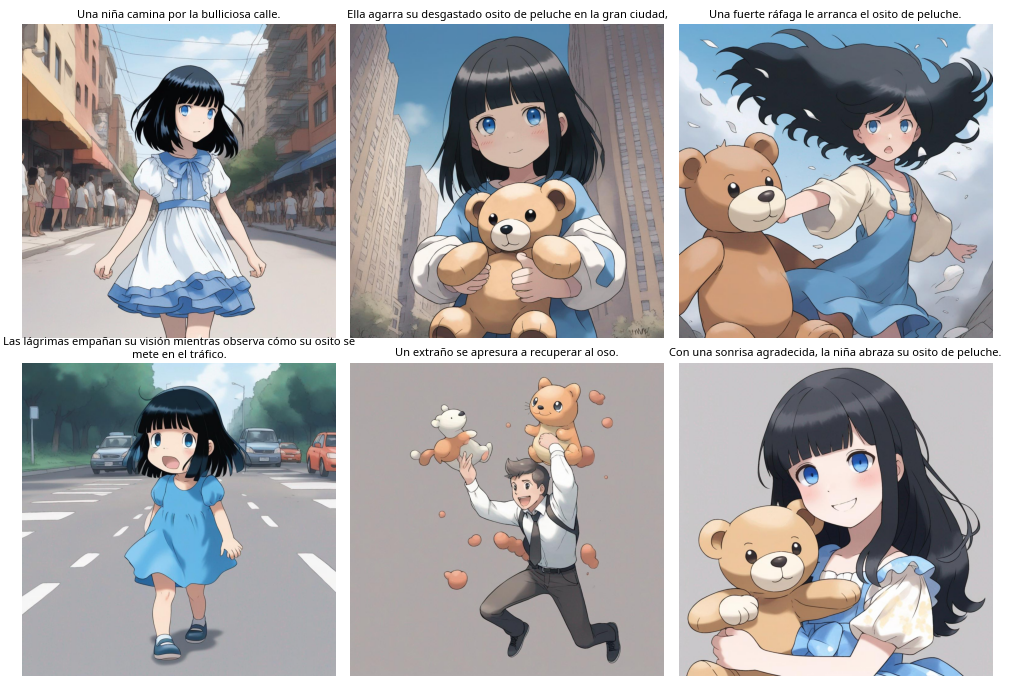

In [ ]:
story_gen('es')

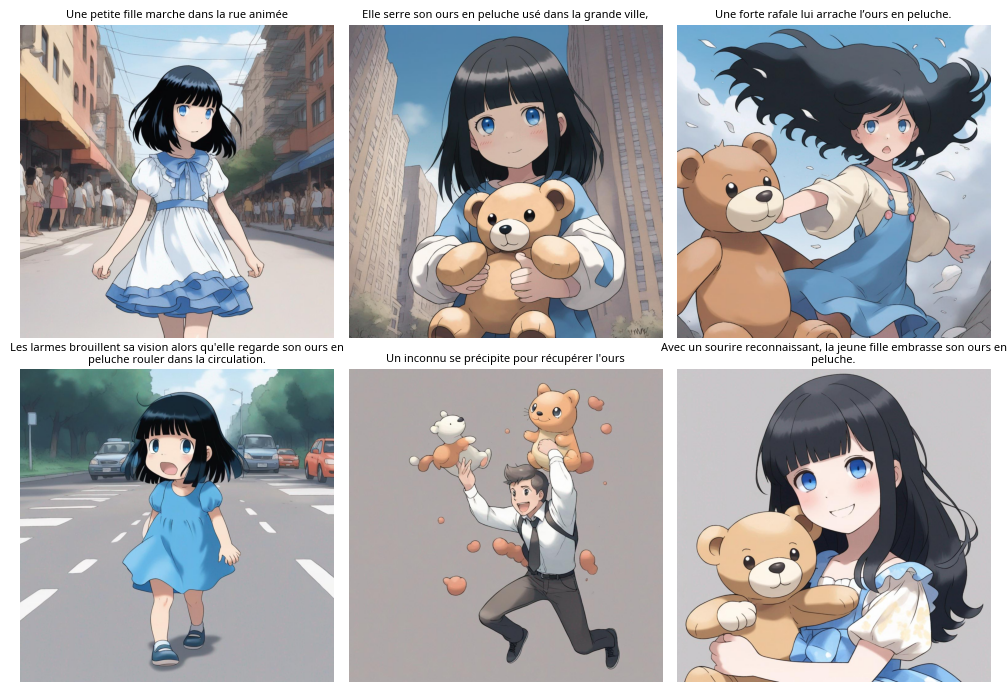

In [ ]:
story_gen('fr')

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset
dataset_original = load_dataset("EdinburghNLP/xsum")

dataset_original

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})